## Introduction.

**Historical data on game sales, user and expert ratings, genres and platforms (for example, Xbox or PlayStation) are available from open sources.**

**It is necessary to identify the patterns that determine the success of a game in terms of sales. This will allow you to place a bet on a potentially popular product and plan advertising campaigns. Available data is up to 2016. It is necessary to plan a campaign for 2017.**

**Description of data**

- Name — the name of the game

- Platform - platform

- Year_of_Release — year of release

- Genre - game genre

- NA_sales - sales in North America (millions of copies sold)

- EU_sales - sales in Europe (millions of copies sold)

- JP_sales - sales in Japan (millions of copies sold)

- Other_sales - sales in other countries (millions of copies sold)

- Critic_Score - critics' score (maximum 100)
- User_Score - user rating (maximum 10)
- Rating - rating from the ESRB (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them an appropriate age category.

Data for 2016 may be incomplete.

## Data preparation.

**We import the libraries necessary for further work.**

In [49]:
import pandas as pd
from scipy import stats as st
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Let’s open the data file and examine the general information presented in the dataset.**

In [50]:
from google.colab import drive
drive.mount('/content/drive')
csv_path = '/content/drive/My Drive/projects/game_market_analysis/games.csv'
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(csv_path)
display(df.head())
display(df.info())
display(df.duplicated().sum())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

0

**Based on the data above, the following features in the dataframe are revealed at first glance:**
- Column names are not in lowercase
- There are gaps in the data
- Column `User_Score` and `Year_of_Release` have the wrong data type
- There are no complete duplicate lines

**Consider the unique values of the `User_Score` column.**

In [51]:
df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

**We see the value `'tbd'`, which means to be determined, i.e. the rating has not yet been determined and is in the process of calculating or collecting the minimum required number of user reviews for formation. Let's replace these values with -1, so that later they can be distinguished in the dataframe from the actual numerical rating values.**

In [52]:
df['User_Score']  = df['User_Score'].replace('tbd', '-1')
df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '-1', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

**Consider the unique values of the `Year_of_Release` column.**

In [53]:
df['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

**Let's correct the column names to lowercase and incorrect data types: `User_Score` needs a float numeric data type, because
This is a rating expressed as a fraction. For `Year_of_Release` the data type is required to be integer, because this column indicates the integer value of the year, but while there are gaps there, we cannot do this, we will deal with the gaps below and then we will correct the data type for this column.**

In [54]:
df = df.rename(
    columns={'Name': 'name',
             'Platform': 'platform',
             'Platform': 'platform',
             'Year_of_Release': 'year_of_release',
             'Genre': 'genre',
             'NA_sales': 'na_sales',
             'EU_sales': 'eu_sales',
             'JP_sales': 'jp_sales',
             'Other_sales': 'other_sales',
             'Critic_Score': 'critic_score',
             'User_Score': 'user_score',
             'Rating': 'rating',
            })

df['user_score'] = df['user_score'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


### Research and fill in data gaps.

**Now consider the gaps in the columns and calculate their share in each column of the total number of rows.**

In [55]:
df.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

**Let’s add a column with total sales for all regions to the dataframe, because There are no gaps in these columns.**

In [56]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


**Let's see which rows have gaps in the `'name'` column.**

In [57]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


**The sales volume is relatively not high for these lines, the year of release of the games is also quite old. Let's delete these rows, saving the dataframe without them.**

In [58]:
df = df[df['name'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           9949 non-null   object 
 11  total_sales      16713 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB


**Let's look at the rows with gaps in the `'year_of_release'` column and sort them by total sales.**

In [59]:
df[df['year_of_release'].isna()].sort_values(by='total_sales', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...
16017,Dream Dancer,DS,NaN,Misc,0.01,0.00,0.00,0.00,NaN,-1.0,E,0.01
15966,Dinotopia: The Sunstone Odyssey,GC,NaN,Action,0.01,0.00,0.00,0.00,50.0,-1.0,T,0.01
15953,PDC World Championship Darts 2008,DS,NaN,Sports,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01
15816,Without Warning,XB,NaN,Shooter,0.01,0.00,0.00,0.00,45.0,2.0,M,0.01


**We see that both games with large sales and those with small ones have gaps in the release year.**

**Let's group the dataframe with gaps in the `'year_of_release'` column by platform type and calculate their share.**

In [60]:
df[df['year_of_release'].isna()].groupby('platform')['name'].count()/len(df[df['year_of_release'].isna()])

platform
2600    0.063197
3DS     0.029740
DS      0.111524
GB      0.003717
GBA     0.040892
GC      0.052045
N64     0.011152
PC      0.063197
PS      0.026022
PS2     0.126394
PS3     0.092937
PSP     0.059480
PSV     0.003717
Wii     0.126394
X360    0.111524
XB      0.078067
Name: name, dtype: float64

**We see that there is no clear connection between the number of gaps in the `'year_of_release'` column and the platform type.**

**Let's group the dataframe with gaps in the `'year_of_release'` column by genre and calculate their share.**

In [61]:
df[df['year_of_release'].isna()].groupby('genre')['name'].count()/len(df[df['year_of_release'].isna()])

genre
Action          0.230483
Adventure       0.037175
Fighting        0.044610
Misc            0.107807
Platform        0.037175
Puzzle          0.040892
Racing          0.085502
Role-Playing    0.063197
Shooter         0.100372
Simulation      0.059480
Sports          0.156134
Strategy        0.037175
Name: name, dtype: float64

**We see that there is no clear connection between the number of gaps in the `'year_of_release'` column and the platform type.**

**Let's group the dataframe with gaps in the `'year_of_release'` column by ESRB rating and calculate their share.**

In [62]:
df[df['year_of_release'].isna()].groupby('rating')['name'].count()/len(df[df['year_of_release'].isna()])

rating
E       0.256506
E10+    0.100372
M       0.100372
RP      0.007435
T       0.208178
Name: name, dtype: float64

**It appears that there is no clear connection between the number of omissions in the `'year_of_release'` column and the game's ESRB rating.**

**To move forward with data analytics, let's replace the gaps in the `'year_of_release'` column with values of -1. After studying the popularity of platforms and their connection with sales, we may further analyze these omissions and replace them with current values using the same search engine. We will not delete these terms, because... it could potentially contain games that have the potential to generate large profits in 2017 sales.**

In [219]:
df.loc[df['year_of_release'].isnull(), 'year_of_release'] = -1
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16711 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   name               16711 non-null  object  
 1   platform           16711 non-null  object  
 2   year_of_release    16711 non-null  int64   
 3   genre              16711 non-null  object  
 4   na_sales           16711 non-null  float64 
 5   eu_sales           16711 non-null  float64 
 6   jp_sales           16711 non-null  float64 
 7   other_sales        16711 non-null  float64 
 8   critic_score       16711 non-null  float64 
 9   user_score         16711 non-null  float64 
 10  rating             16711 non-null  object  
 11  total_sales        16711 non-null  float64 
 12  total_sales_range  16711 non-null  category
dtypes: category(1), float64(7), int64(1), object(4)
memory usage: 1.7+ MB


**Now, as planned earlier, let's change the data type of the `'year_of_release'` column to integer. And let’s check the proportion of gaps in the columns of the dataframe after all the transformations.**

In [64]:
df['year_of_release'] = df['year_of_release'].astype(int)
display(df.info())
df.isna().mean()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           9949 non-null   object 
 11  total_sales      16713 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB


None

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513133
user_score         0.400826
rating             0.404715
total_sales        0.000000
dtype: float64

**We see that the largest proportion of gaps contain columns that relate to game ratings.**

**Let's check if there is any direct obvious connection between the gaps in the rating columns `'critic_score'`, `'user_score'`, `'rating'` with genre, platform and sales.**

**Let's start with the `'critic_score'` column. Let's look at the share of passes in this column depending on genre, platform and sales.**

In [65]:
display(df[df['critic_score'].isna()]
        .groupby('genre')['name']
        .count()
        / len(df[df['critic_score'].isna()]))

display(df[df['critic_score'].isna()]
        .groupby('platform')['name']
        .count()
        / len(df[df['critic_score'].isna()]))

df['total_sales_range'] = pd.cut(df['total_sales'], 20)

(df[df['critic_score'].isna()]
        .groupby('total_sales_range')['name']
        .count()
        / len(df[df['critic_score'].isna()]))

genre
Action          0.172458
Adventure       0.114272
Fighting        0.051306
Misc            0.143074
Platform        0.045592
Puzzle          0.041511
Racing          0.059118
Role-Playing    0.088736
Shooter         0.044193
Simulation      0.060751
Sports          0.134562
Strategy        0.044426
Name: name, dtype: float64

platform
2600    0.015508
3DO     0.000350
3DS     0.041045
DC      0.004431
DS      0.167211
GB      0.011427
GBA     0.044776
GC      0.012593
GEN     0.003148
GG      0.000117
N64     0.037197
NES     0.011427
NG      0.001399
PC      0.030201
PCFX    0.000117
PS      0.116255
PS2     0.100630
PS3     0.059585
PS4     0.016325
PSP     0.087104
PSV     0.036147
SAT     0.020173
SCD     0.000700
SNES    0.027868
TG16    0.000233
WS      0.000700
Wii     0.085704
WiiU    0.006646
X360    0.040345
XB      0.011544
XOne    0.009095
Name: name, dtype: float64

total_sales_range
(-0.0825, 4.127]    0.989855
(4.127, 8.254]      0.007113
(8.254, 12.381]     0.001283
(12.381, 16.508]    0.000583
(16.508, 20.635]    0.000466
(20.635, 24.762]    0.000233
(24.762, 28.889]    0.000117
(28.889, 33.016]    0.000233
(33.016, 37.143]    0.000000
(37.143, 41.27]     0.000117
(41.27, 45.397]     0.000000
(45.397, 49.524]    0.000000
(49.524, 53.651]    0.000000
(53.651, 57.778]    0.000000
(57.778, 61.905]    0.000000
(61.905, 66.032]    0.000000
(66.032, 70.159]    0.000000
(70.159, 74.286]    0.000000
(74.286, 78.413]    0.000000
(78.413, 82.54]     0.000000
Name: name, dtype: float64

**Only in the sales column can you see a clear correlation between the presence of gaps in the `'critic_score'` column. Almost 99% of the `'critic_score'' missing columns occur at the very bottom of the sales range, which can be explained as follows: games that were not very popular had relatively low sales and, therefore, were unlikely to be "noticed" by critics.**

**Fill in these blanks with the value -1.**

In [66]:
df['critic_score'] = df['critic_score'].fillna(-1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   name               16713 non-null  object  
 1   platform           16713 non-null  object  
 2   year_of_release    16713 non-null  int64   
 3   genre              16713 non-null  object  
 4   na_sales           16713 non-null  float64 
 5   eu_sales           16713 non-null  float64 
 6   jp_sales           16713 non-null  float64 
 7   other_sales        16713 non-null  float64 
 8   critic_score       16713 non-null  float64 
 9   user_score         10014 non-null  float64 
 10  rating             9949 non-null   object  
 11  total_sales        16713 non-null  float64 
 12  total_sales_range  16713 non-null  category
dtypes: category(1), float64(7), int64(1), object(4)
memory usage: 1.7+ MB


**Continue with the `'user_score'` column. Let's look at the share of passes in this column depending on genre, platform and sales.**

In [67]:
display(df[df['user_score'].isna()]
        .groupby('genre')['name']
        .count()
        / len(df[df['user_score'].isna()]))

display(df[df['user_score'].isna()]
        .groupby('platform')['name']
        .count()
        / len(df[df['user_score'].isna()]))

(df[df['user_score'].isna()]
        .groupby('total_sales_range')['name']
        .count()
        / len(df[df['user_score'].isna()]))

genre
Action          0.173608
Adventure       0.125989
Fighting        0.061352
Misc            0.128676
Platform        0.047918
Puzzle          0.035976
Racing          0.055979
Role-Playing    0.108225
Shooter         0.044783
Simulation      0.043589
Sports          0.124198
Strategy        0.049709
Name: name, dtype: float64

platform
2600    0.019854
3DO     0.000448
3DS     0.043290
DC      0.005672
DS      0.131214
GB      0.014629
GBA     0.045529
GC      0.012987
GEN     0.004030
GG      0.000149
N64     0.047619
NES     0.014629
NG      0.001791
PC      0.023138
PCFX    0.000149
PS      0.147783
PS2     0.101508
PS3     0.054784
PS4     0.019257
PSP     0.099269
PSV     0.041797
SAT     0.025825
SCD     0.000896
SNES    0.035677
TG16    0.000299
WS      0.000896
Wii     0.047768
WiiU    0.006270
X360    0.031647
XB      0.013136
XOne    0.008061
Name: name, dtype: float64

total_sales_range
(-0.0825, 4.127]    0.987461
(4.127, 8.254]      0.008658
(8.254, 12.381]     0.001642
(12.381, 16.508]    0.000746
(16.508, 20.635]    0.000597
(20.635, 24.762]    0.000299
(24.762, 28.889]    0.000149
(28.889, 33.016]    0.000299
(33.016, 37.143]    0.000000
(37.143, 41.27]     0.000149
(41.27, 45.397]     0.000000
(45.397, 49.524]    0.000000
(49.524, 53.651]    0.000000
(53.651, 57.778]    0.000000
(57.778, 61.905]    0.000000
(61.905, 66.032]    0.000000
(66.032, 70.159]    0.000000
(70.159, 74.286]    0.000000
(74.286, 78.413]    0.000000
(78.413, 82.54]     0.000000
Name: name, dtype: float64

**Similarly, only in the column related to sales, you can see a clear connection between the presence of gaps in the `'user_score'` column. Almost 99% of the missing column `'user_score'` occurs in the lowest range of sales, which can be explained as follows: games that were not very popular had relatively low sales and, accordingly, were "deprived" of attention and user ratings.**

**Fill in these blanks with the value -1.**

In [68]:
df['user_score'] = df['user_score'].fillna(-1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   name               16713 non-null  object  
 1   platform           16713 non-null  object  
 2   year_of_release    16713 non-null  int64   
 3   genre              16713 non-null  object  
 4   na_sales           16713 non-null  float64 
 5   eu_sales           16713 non-null  float64 
 6   jp_sales           16713 non-null  float64 
 7   other_sales        16713 non-null  float64 
 8   critic_score       16713 non-null  float64 
 9   user_score         16713 non-null  float64 
 10  rating             9949 non-null   object  
 11  total_sales        16713 non-null  float64 
 12  total_sales_range  16713 non-null  category
dtypes: category(1), float64(7), int64(1), object(4)
memory usage: 1.7+ MB


**Continue with the `'rating'` column. Let's look at the share of passes in this column depending on genre, platform and sales.**

In [69]:
display(df[df['rating'].isna()]
        .groupby('genre')['name']
        .count()
        / len(df[df['rating'].isna()]))

display(df[df['rating'].isna()]
        .groupby('platform')['name']
        .count()
        / len(df[df['rating'].isna()]))

(df[df['rating'].isna()]
        .groupby('total_sales_range')['name']
        .count()
        / len(df[df['rating'].isna()]))

genre
Action          0.174601
Adventure       0.126700
Fighting        0.060763
Misc            0.128326
Platform        0.047161
Puzzle          0.035186
Racing          0.055736
Role-Playing    0.106594
Shooter         0.044944
Simulation      0.045092
Sports          0.124039
Strategy        0.050857
Name: name, dtype: float64

platform
2600    0.019663
3DO     0.000444
3DS     0.043170
DC      0.005618
DS      0.129805
GB      0.014488
GBA     0.044352
GC      0.012862
GEN     0.003992
GG      0.000148
N64     0.047161
NES     0.014488
NG      0.001774
PC      0.029568
PCFX    0.000148
PS      0.146215
PS2     0.100532
PS3     0.056032
PS4     0.020254
PSP     0.098315
PSV     0.041248
SAT     0.025577
SCD     0.000887
SNES    0.035334
TG16    0.000296
WS      0.000887
Wii     0.047014
WiiU    0.006209
X360    0.031047
XB      0.013454
XOne    0.009018
Name: name, dtype: float64

total_sales_range
(-0.0825, 4.127]    0.987729
(4.127, 8.254]      0.008427
(8.254, 12.381]     0.001626
(12.381, 16.508]    0.000739
(16.508, 20.635]    0.000591
(20.635, 24.762]    0.000296
(24.762, 28.889]    0.000148
(28.889, 33.016]    0.000296
(33.016, 37.143]    0.000000
(37.143, 41.27]     0.000148
(41.27, 45.397]     0.000000
(45.397, 49.524]    0.000000
(49.524, 53.651]    0.000000
(53.651, 57.778]    0.000000
(57.778, 61.905]    0.000000
(61.905, 66.032]    0.000000
(66.032, 70.159]    0.000000
(70.159, 74.286]    0.000000
(74.286, 78.413]    0.000000
(78.413, 82.54]     0.000000
Name: name, dtype: float64

**Similarly, only in the column associated with sales, you can see a clear connection between the presence of gaps in the `'rating'` column. Almost 99% of the `'rating'' column misses occur in the lowest sales range, which can be explained as follows: games that were not very popular had relatively low sales and, accordingly, were "neglected" by the Entertainment Software Rating Board, founded in 1994, and accordingly its assessment.**

**Fill in these blanks with the value -1.**

In [70]:
df['rating'] = df['rating'].fillna(-1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   name               16713 non-null  object  
 1   platform           16713 non-null  object  
 2   year_of_release    16713 non-null  int64   
 3   genre              16713 non-null  object  
 4   na_sales           16713 non-null  float64 
 5   eu_sales           16713 non-null  float64 
 6   jp_sales           16713 non-null  float64 
 7   other_sales        16713 non-null  float64 
 8   critic_score       16713 non-null  float64 
 9   user_score         16713 non-null  float64 
 10  rating             16713 non-null  object  
 11  total_sales        16713 non-null  float64 
 12  total_sales_range  16713 non-null  category
dtypes: category(1), float64(7), int64(1), object(4)
memory usage: 1.7+ MB


### Checking for Implicit Duplicates.

**Let's now check the columns for implicit duplicates. Let's start with the `'rating'` column.**

In [71]:
df['rating'].unique()

array(['E', -1, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

**The `Rating` column is the ESRB (Entertainment Software Rating Board) rating:**

- `'E'` - *Everyone* - for all ages.
- `'E10+'` - *Everyone 10+* - for ages 10+.
- `'T'` - *Teen* - for ages 13+.
- `'M'` - *Mature* - for ages 17+.
- `'AO'` - *Adults only* - for ages 18+.
- `'RP'` - *Rating pending* - used only in advertising and marketing materials when the application has already been submitted for evaluation by the ESRB, but has not yet been reviewed and assigned a rating.
- `'K-A'` - *Kids to adults* - the rating was previously called K-A (Kids to Adults), but was changed in 1998 to an E rating - i.e. for all.
- `'EC'` - *Early Childhood* - content suitable for ages 3+.

**We conclude that the rating `'K-A'` must be replaced with the current `'E'`, and gaps in the form of -1 and `'RP'` with 'Empty', because the semantic load is the same.**

In [72]:
df['rating']  = df['rating'].replace('K-A', 'E')
df['rating']  = df['rating'].replace('RP', 'Empty')
df['rating']  = df['rating'].replace(-1, 'Empty')
df['rating'].unique()

array(['E', 'Empty', 'M', 'T', 'E10+', 'AO', 'EC'], dtype=object)

**Now check the `'genre'` column for implicit duplicates.**

In [73]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

**Using a web search we were able to find out that there are no implicit duplicates here.**

**Let's look for duplicates in the `'name'` and `'platform'` columns.**

In [74]:
df[df.duplicated(subset=['name'], keep=False)].sort_values(by='name').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,total_sales_range
3862,Frozen: Olaf's Quest,DS,2013,Platform,0.21,0.26,0.00,0.04,-1.0,-1.0,Empty,0.51,"(-0.0825, 4.127]"
3358,Frozen: Olaf's Quest,3DS,2013,Platform,0.27,0.27,0.00,0.05,-1.0,-1.0,Empty,0.59,"(-0.0825, 4.127]"
14658,007: Quantum of Solace,PC,2008,Action,0.01,0.01,0.00,0.00,70.0,6.3,T,0.02,"(-0.0825, 4.127]"
9507,007: Quantum of Solace,DS,2008,Action,0.11,0.01,0.00,0.01,65.0,-1.0,T,0.13,"(-0.0825, 4.127]"
3120,007: Quantum of Solace,Wii,2008,Action,0.29,0.28,0.01,0.07,54.0,7.5,T,0.65,"(-0.0825, 4.127]"


**We see that although the name of the game is duplicated, the name of the platform may differ, and for each game-platform pair there is its own sales statistics. Therefore, searching for duplicates for these two columns must be done in a related pair. Let's do it.**

In [75]:
df[df.duplicated(subset=['name', 'platform'], keep=False)].sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,total_sales_range
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E,2.56,"(-0.0825, 4.127]"
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E,0.01,"(-0.0825, 4.127]"
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.56,"(-0.0825, 4.127]"
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.25,"(-0.0825, 4.127]"
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T,0.29,"(-0.0825, 4.127]"
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T,0.08,"(-0.0825, 4.127]"
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+,1.17,"(-0.0825, 4.127]"
4127,Sonic the Hedgehog,PS3,-1,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+,0.48,"(-0.0825, 4.127]"


**Using a search engine, it was possible to determine that NFS Most Wanted actually had two versions: one released in 2005 and one released in 2012. As for the first line and the last - the game data is indeed duplicated, it is necessary to delete these duplicates. Let's do it.**

In [76]:
df = df.drop([16230, 4127])

**Consider the `'total_sales'` column.**

In [77]:
df['total_sales'].describe()

count    16711.000000
mean         0.533349
std          1.548370
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

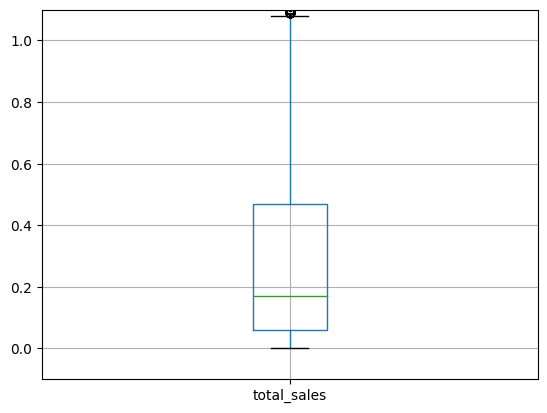

In [78]:
plt.ylim([-0.1,1.1])
df.boxplot(column='total_sales');

**We see that most of the dataframe values lie in the range from 0 to ~1.1 million total sold copies of certain games.**

### Section conclusions.

**After examining the data in the sales columns using information from the Internet, it was determined that these numbers indicate the number of copies of the game sold in millions of units. at the time of uploading this data, i.e. for the entire time, and not just in the first year\year of the game's release.**

**We see that most of the dataframe values lie in the range from 0 to ~1.1 million total game copies sold.**

**Omissions in the columns responsible for the rating (`'critic_score'`, `'user_score'`, `'rating'`) are associated with games sold in fewer copies, i.e. less popular.**

**Omissions in the `'year_of_release'` and `'name'` columns are most likely due to a problem with data upload.**

**No complete duplicate lines were found in the dataframe, except for two lines indicating the same game for the same platform.**

**Implicit duplicates found among ESRB rating values in the `'rating'` column.**

## Exploratory data analysis.

### Distribution of the number of games released by year.

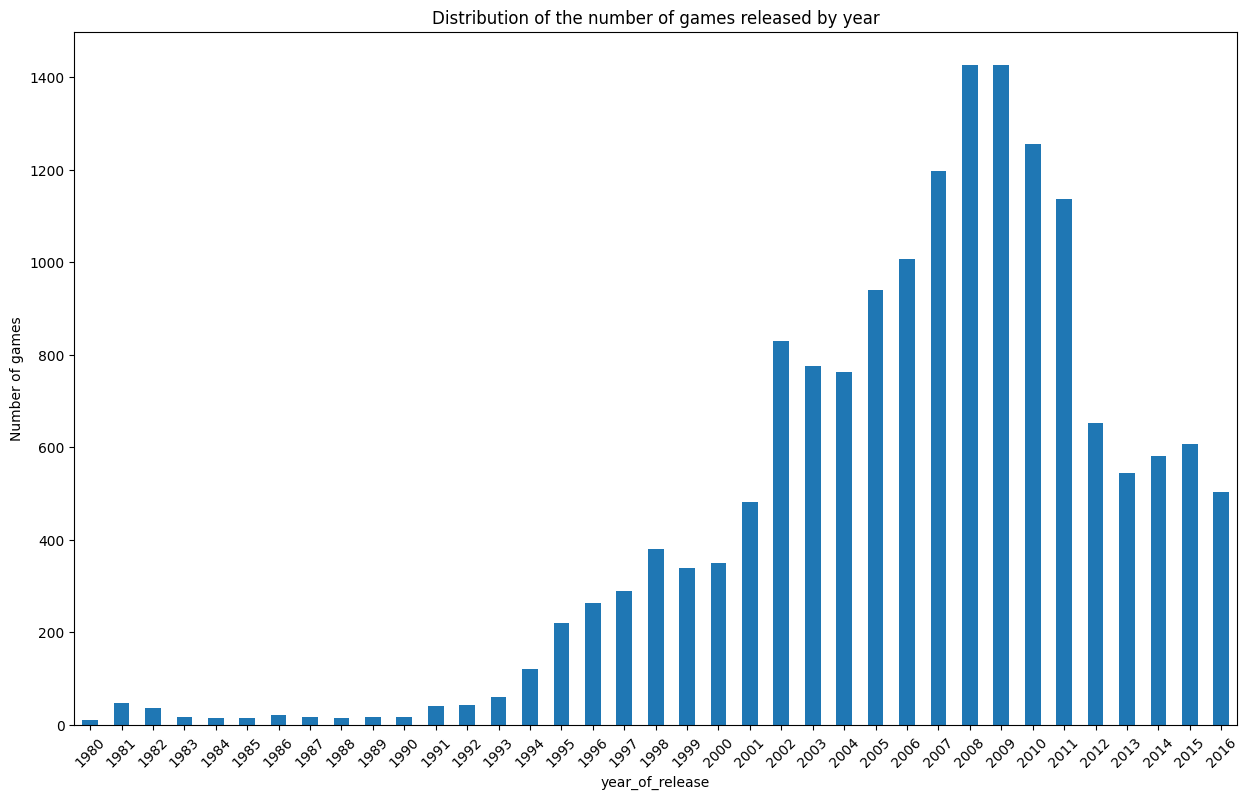

In [79]:
plt.title('Distribution of the number of games released by year')
plt.xlabel('Year')
plt.ylabel('Number of games')
(df[df['year_of_release'] > 0].groupby('year_of_release')['name'].count() # >0 is a filter for gaps in data by year
 .plot(kind='bar', figsize=(15, 9), rot=45));

**We see that since 1994 there has been a rapid increase in the number of games released, with a local decline from the plateau in 1998-2000 and 2002-2004. Growth is observed until 2008, from 2009 there is a fairly sharp decline until 2013, after which a local plateau in growth is observed.**

### Distribution of data across platforms.

**Let's see how the number of game copies sold is distributed across platforms for the entire period up to 2016.**

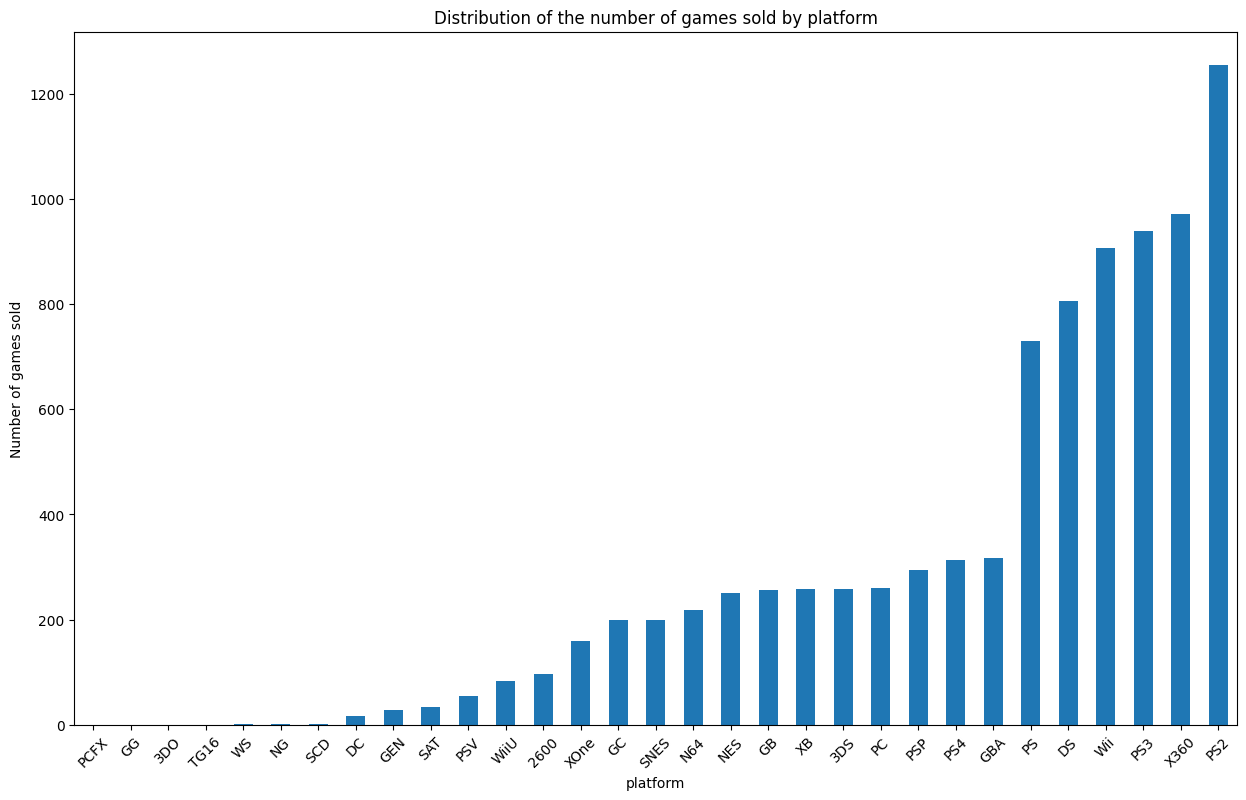

In [80]:
plt.title('Distribution of the number of games sold by platform')
plt.xlabel('Platform')
plt.ylabel('Number of games sold')
(df.groupby('platform').sum(numeric_only=True)
 .sort_values(by='total_sales')['total_sales']
 .plot(kind='bar', figsize=(15, 9), rot=45));

**Let's see how the number of released games is distributed by year for the platforms with the largest sales.**

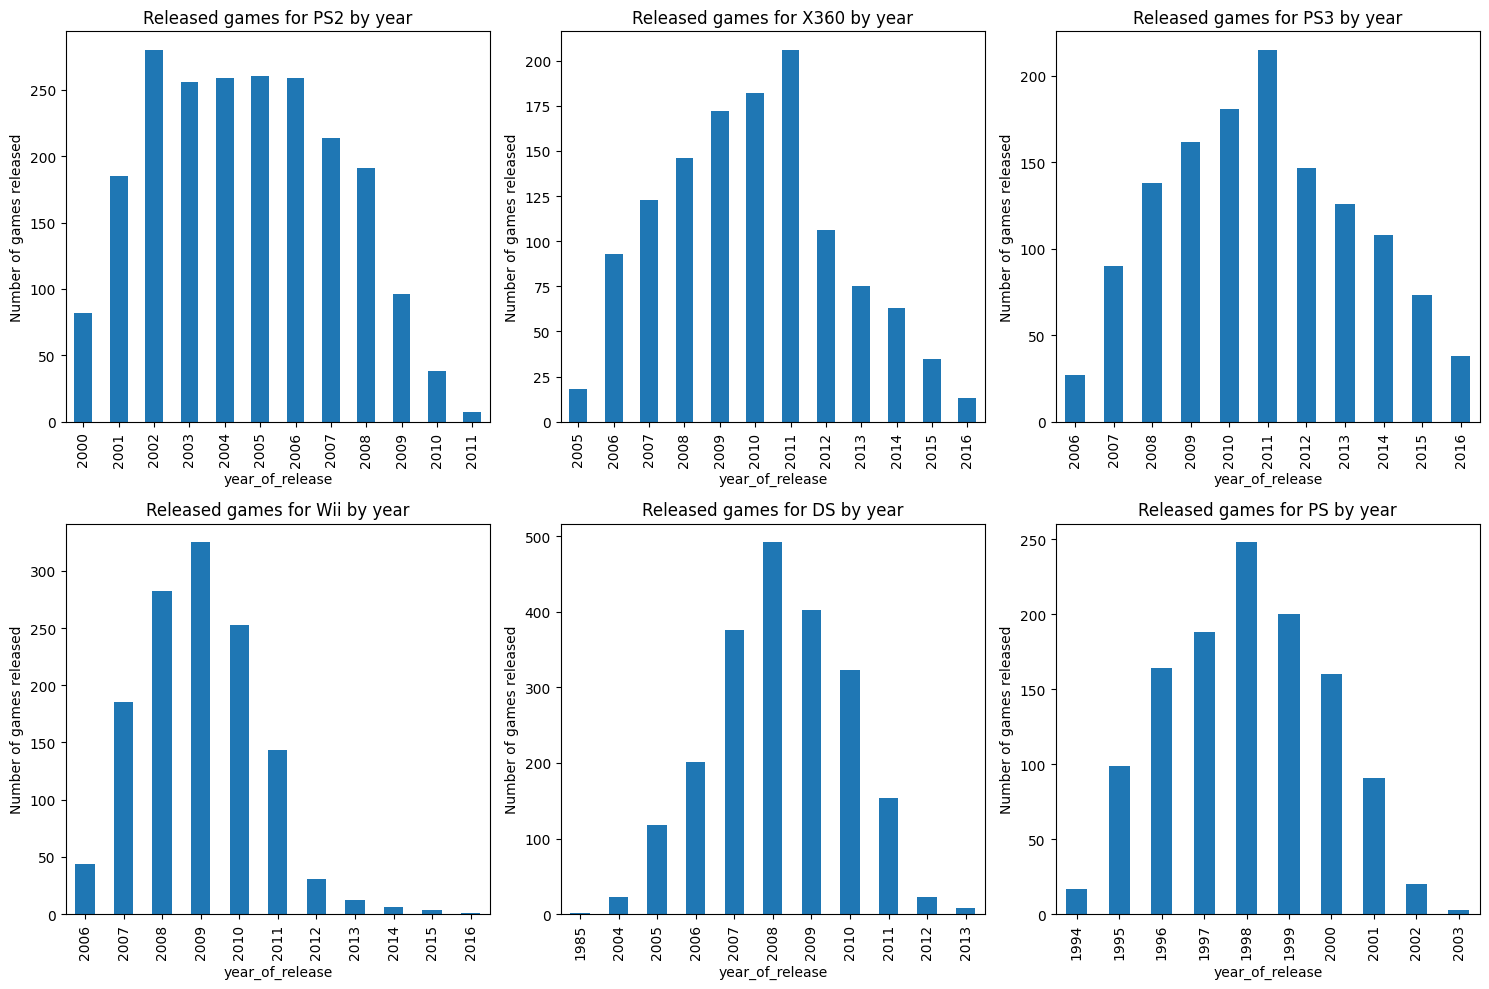

In [213]:
def plot_games_per_year_for_X(df, platform): #create a function that plots the distribution by year for a specific platform
    plt.title(f'Released games for {platform} by year')
    plt.xlabel('Year')
    plt.ylabel('Number of games released')
    (df[(df['platform'] == platform) & (df['year_of_release'] > 0)]
     .groupby('year_of_release')
     .count()['name']
     .plot(kind='bar'))

test = df.groupby('platform').sum(numeric_only=True).sort_values(by='total_sales', ascending=False)['total_sales'].reset_index()
test = test.head(6)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Create a 2x3 grid of subplots

for index, ax in enumerate(axes.flat):
    if index < len(test['platform']):
        platform = test['platform'][index]
        plt.sca(ax)  # Set the current axes to the subplot
        plot_games_per_year_for_X(df, platform)

plt.tight_layout()
plt.show()

**We see that most platforms are characterized by first an increase in the number of games released, and then a decline. The peak value usually occurs in the middle of the platform's life cycle.**

**Let's see how the number of games released by platform is distributed over the entire period up to 2016.**

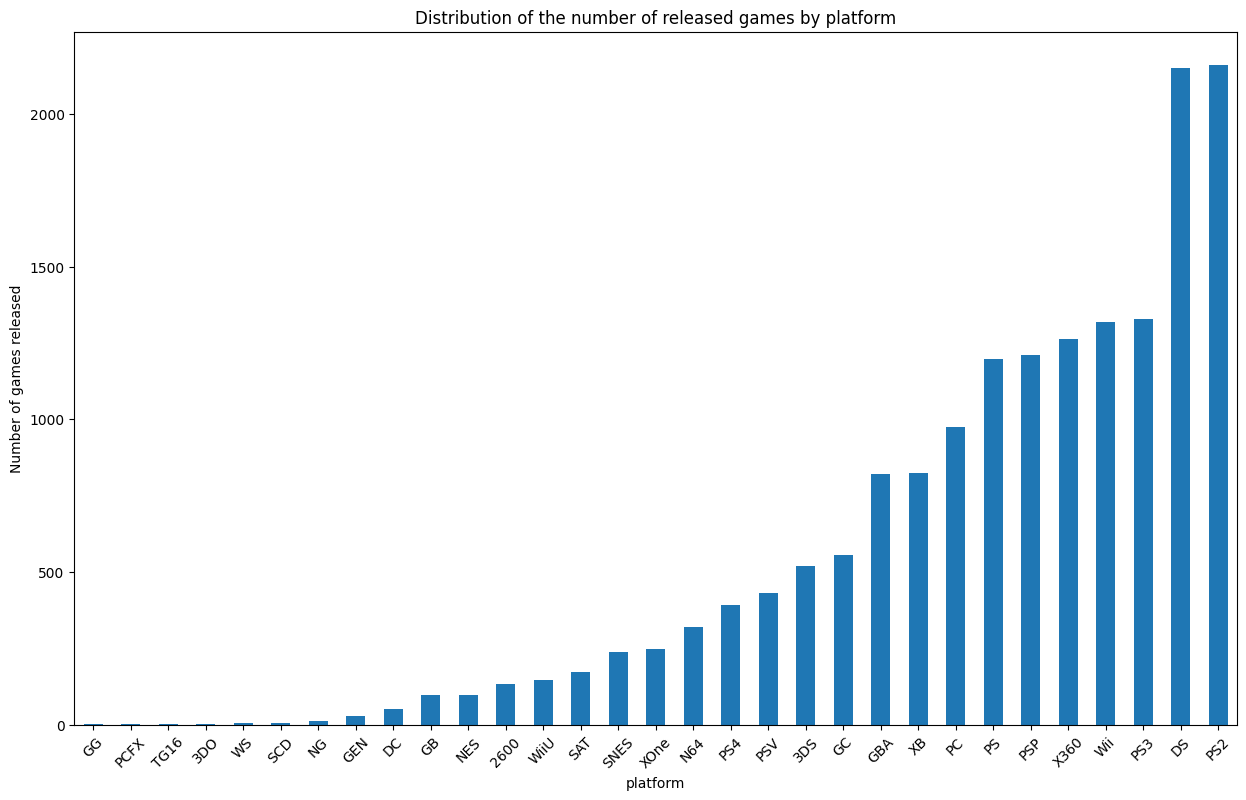

In [82]:
plt.title('Distribution of the number of released games by platform')
plt.xlabel('Platform')
plt.ylabel('Number of games released')
(df.groupby('platform').count()
 .sort_values(by='name')['name']
 .plot(kind='bar', figsize=(15, 9), rot=45));

**Let us now study the lifespan of each platform from the point of view of the year in which games for it began and ended.**

In [218]:
# We form a dataframe with grouping by platforms indicating the min and max values of the year of release of the games
t = df[df['year_of_release'] > 0] \
  .groupby('platform')\
      .agg(['min', 'max'])['year_of_release'] \
          .reset_index()

# We create a dataframe with grouping by platforms indicating the amount of sold game copies for all time
t1 = df[df['year_of_release'] > 0] \
  .groupby('platform')\
      .sum(numeric_only=True)['total_sales'] \
          .reset_index()
# create a column to indicate the “lifetime” of the platform in years, relevant for those who have not released games since 2015
t['years'] = t['max'] - t['min']

# We form a dataframe with grouping by platforms, indicating the min and max values of the year of release of games and the amount of sales. copy games
df_platforms = t.merge(t1, on='platform') \
  .sort_values(by='total_sales', ascending=True) \
      .reset_index(drop=True)

df_platforms

,platform,min,max,years,total_sales
0,PCFX,1996,1996,0,0.03
1,GG,1992,1992,0,0.04
2,3DO,1994,1995,1,0.10
3,TG16,1995,1995,0,0.16
4,WS,1999,2001,2,1.42
5,NG,1993,1996,3,1.44
6,SCD,1993,1994,1,1.86
7,DC,1998,2008,10,15.95
8,GEN,1990,1994,4,28.35
9,SAT,1994,1999,5,33.59


**Now we have a table in which we can see for each platform its “lifetime” on the market at a given time (for 2016), as well as the total sales of games for this platform in millions of units**

**We will filter out platforms with a small number of games sold, taking into account that platforms that have a max. the year of release of the games is 2016, because Thus, we may accidentally filter out platforms that have low game sales in 2016 due to the newness of the platform, and not due to their unpopularity.**

In [84]:
df_platforms_filtered = df_platforms[df_platforms['total_sales'] > 2].copy()
df_platforms_filtered

,platform,min,max,years,total_sales
7,DC,1998,2008,10,15.95
8,GEN,1990,1994,4,28.35
9,SAT,1994,1999,5,33.59
10,PSV,2011,2016,5,53.81
11,WiiU,2012,2016,4,82.19
12,2600,1980,1989,9,86.48
13,XOne,2013,2016,3,159.32
14,GC,2001,2007,6,196.73
15,SNES,1990,1999,9,200.04
16,N64,1996,2002,6,218.01


**Let us now estimate the characteristic “life” of gaming platforms. Let us now construct a range diagram for the platform lifetime values.**

**Let's build it for two cases:**
- (1) When platforms that are still relevant in 2016 are filtered out, i.e. We look at historical data without taking into account platforms, which may be relevant for next year;
- (2) When all platforms from the dataframe are used, with the exception of those that we excluded due to lack of relevance and low sales.

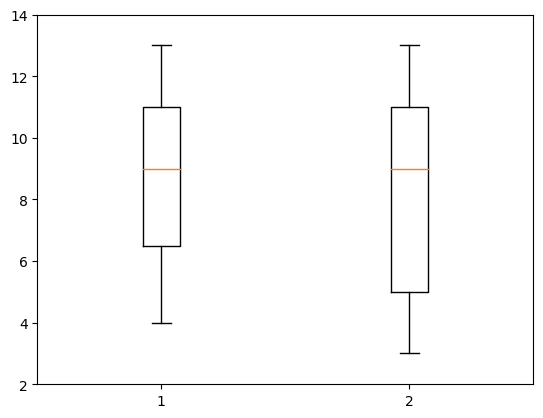

In [85]:
t_1 = df_platforms_filtered[df_platforms_filtered['max'] < 2016]['years']
t_2 = df_platforms_filtered['years']
plt.ylim(2, 14)
plt.boxplot ([t_1, t_2]);

In [86]:
display(t_1.describe())
t_2.describe()

count    15.00000
mean      9.80000
std       5.63408
min       4.00000
25%       6.50000
50%       9.00000
75%      11.00000
max      28.00000
Name: years, dtype: float64

count    24.000000
mean      9.541667
std       6.807791
min       3.000000
25%       5.000000
50%       9.000000
75%      11.000000
max      31.000000
Name: years, dtype: float64

**We see that the median value in each of these cases does not change. Those. we can conclude that the typical lifespan of the platform is 9 years. At the same time, we remember from the study above that each platform first has an increase in the number of games released, then a peak, after which there is a decline, i.e. The peak popularity of the platform and games for it occurs in the 5th year of its life cycle. This information must be taken into account.**

**In order to further analyze the data taking into account our final goal - to select games and platforms that will have the best sales potential in 2017 - it is necessary to filter the original dataframe by games that were released no earlier than: 2017 - 5 = 2012. **

In [87]:
df_filtered = df[df['year_of_release'] >= 2012].copy()
df_filtered

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,total_sales_range
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,"(20.635, 24.762]"
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,"(12.381, 16.508]"
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,Empty,14.63,"(12.381, 16.508]"
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,Empty,14.60,"(12.381, 16.508]"
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79,"(12.381, 16.508]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,Empty,0.01,"(-0.0825, 4.127]"
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,Empty,0.01,"(-0.0825, 4.127]"
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,Empty,0.01,"(-0.0825, 4.127]"
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,Empty,0.01,"(-0.0825, 4.127]"


### Analysis of data for the current period.

**We will determine which platforms are leading in sales, and whether they are growing or falling. We will select several potentially profitable platforms.**

**Let's plot the dependence of total sales on the platform.**

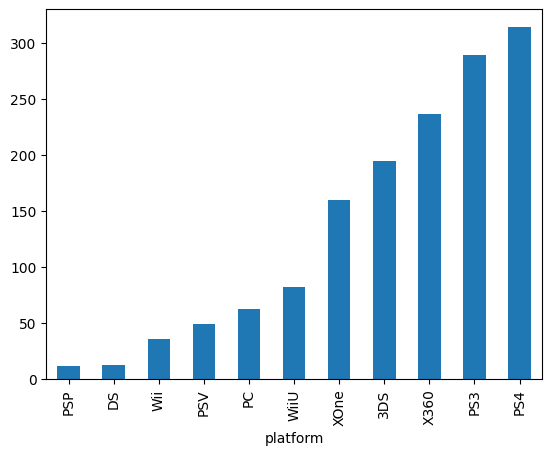

In [164]:
df_filtered.groupby('platform').sum(numeric_only=True).sort_values(by='total_sales')['total_sales'].plot(kind='bar');

**Now let’s see how the number of games released for each of the top 9 platforms in terms of sales changes depending on the year, thus we will see the growth or decline for each of them.**

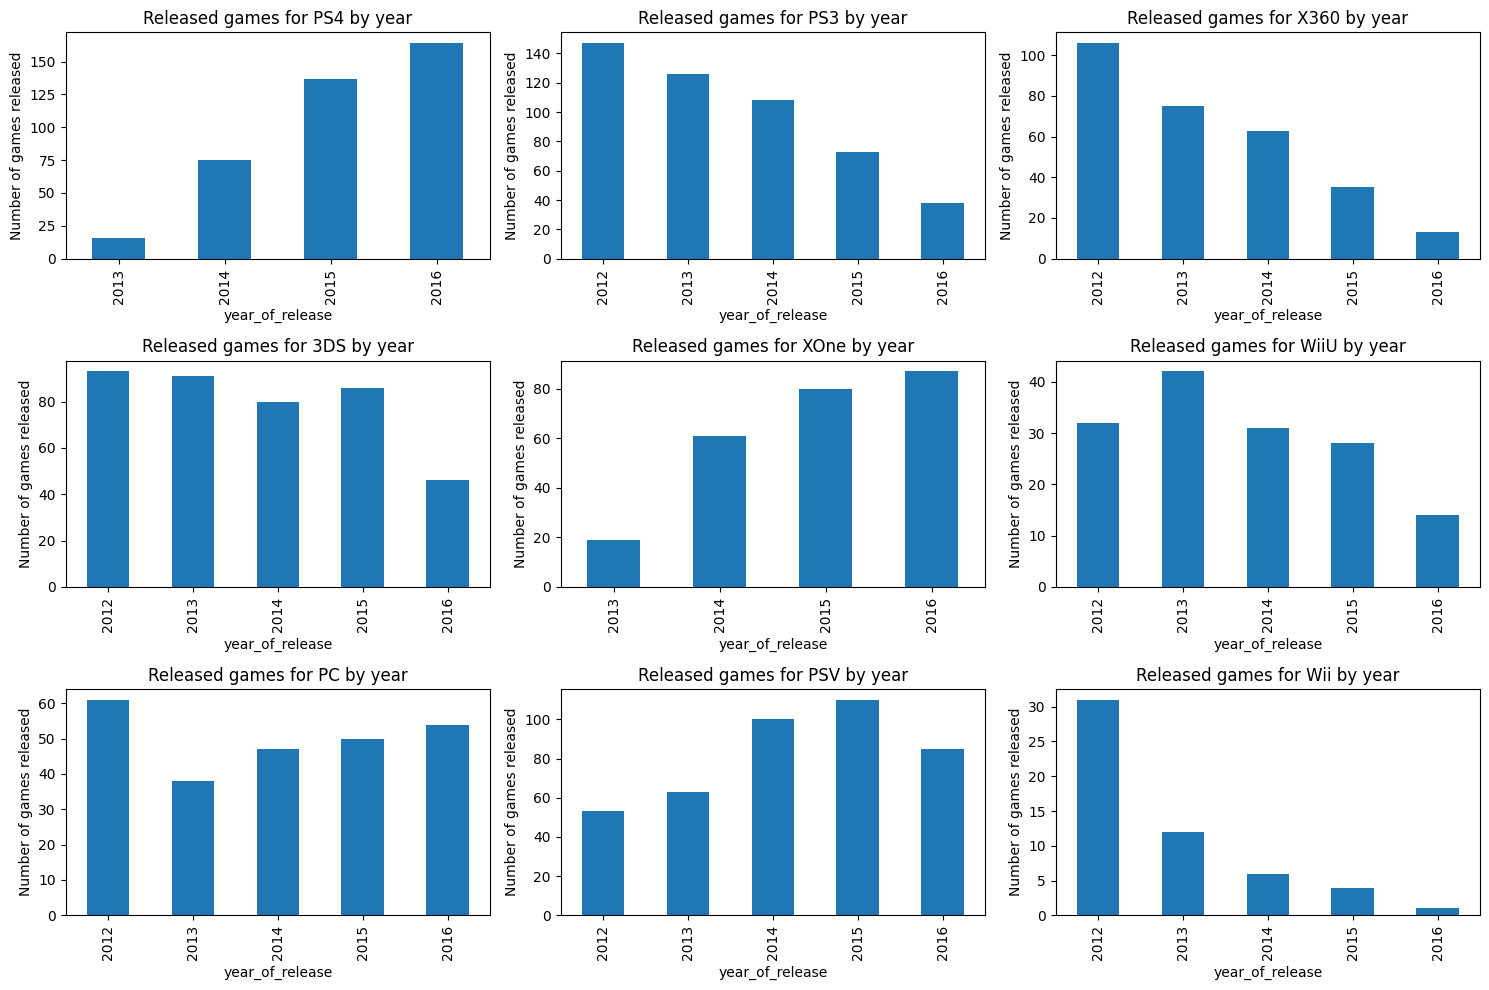

In [214]:
t_3 = df_filtered.groupby('platform').sum(numeric_only=True).sort_values(by='total_sales', ascending=False).reset_index()['platform']
t_3 = t_3.head(9)

fig, axes = plt.subplots(3, 3, figsize=(15, 10))  # Create a 3x3 grid of subplots

for index, ax in enumerate(axes.flat):
    if index < len(t_3):
        platform = t_3[index]
        plt.sca(ax)  # Set the current axes to the subplot
        plot_games_per_year_for_X(df_filtered, platform)

plt.tight_layout()
plt.show()

**Selected platforms in terms of growth or decline were distributed as follows:**

- **`'PS4'`** - steady growth until 2016;
- **`'PS3'`** - linear decline until 2016;
- **`'X360'`** - linear decline until 2016;
- **`'3DS'`** - sharp decline in 2016;
- **`'XOne'`** - steady growth until 2016;
- **`'WiiU'`** - linear decline until 2016 with a peak in 2013;
- **`'PC'`** - decline in 2013 and further growth until 2016;
- **`'PSV'`** - fall in 2016;
- **`'Wii'`** - strong decline until 2016.

**Platforms with growth at the time of 2016: `'PS4'`, `'XOne'`, `'PC'`. We will focus on them further.**

**For the selected platforms, we will construct a range diagram of total sales.**

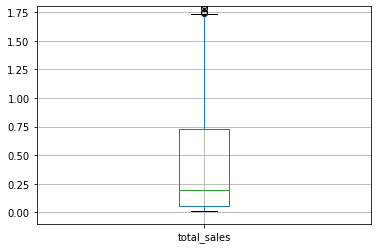

In [ ]:
plt.ylim(-0.1, 1.8)
df_filtered_ps4 = df_filtered[df_filtered['platform'] == 'PS4'].copy()
df_filtered_ps4.boxplot(column='total_sales');

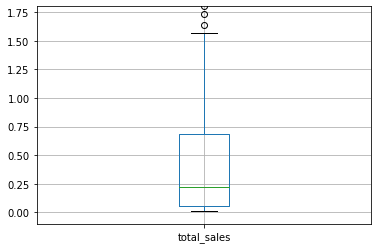

In [ ]:
plt.ylim(-0.1, 1.8)
df_filtered_xone = df_filtered[df_filtered['platform'] == 'XOne'].copy()
df_filtered_xone.boxplot(column='total_sales');

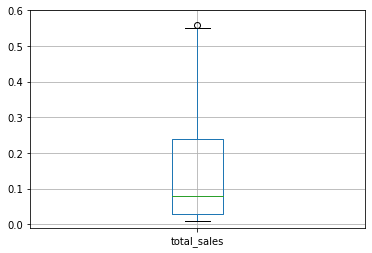

In [ ]:
plt.ylim(-0.01, 0.6)
df_filtered_pc = df_filtered[df_filtered['platform'] == 'PC'].copy()
df_filtered_pc.boxplot(column='total_sales');

** Because In the range diagrams for all three platforms, we see that the median tends more to the lower edge of the box, and the upper limit is much further from it, we can conclude that the number of outliers in each case is small. The average sales of games for ''PS4'', ''XOne'' is about 250 thousand copies, for ''PC'' - about 100 thousand copies.**

**Let's look at which games are characterized by outliers in the range diagram for each platform.**

In [ ]:
def usy_boxplota(df, column): #function that determines the values of the whiskers of the range diagram
    min = df[column].min()
    max = df[column].max()
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR  = Q3 - Q1
    lowest = (lambda: min if min > Q1 - 1.5 * IQR else Q1 - 1.5 * IQR)
    highest = (lambda: max if max < Q3 + 1.5 * IQR else Q3 + 1.5 * IQR)
    return [lowest(), highest()]

def games_above_boxplot(df): #function that forms a dataframe from outlier values
    return (df[df['total_sales'] > usy_boxplota(df, 'total_sales')[1]]
            .sort_values(by='total_sales', ascending=False)
            .reset_index(drop=True))

top_ps4_games = games_above_boxplot(df_filtered_ps4)
top_ps4_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,total_sales_range
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,Empty,14.63,"(12.381, 16.508]"
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,"(12.381, 16.508]"
2,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58,"(8.254, 12.381]"
3,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,Empty,7.98,"(4.127, 8.254]"
4,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66,"(4.127, 8.254]"
5,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60,"(4.127, 8.254]"
6,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17,"(4.127, 8.254]"
7,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08,"(4.127, 8.254]"
8,Destiny,PS4,2014,Shooter,2.49,2.07,0.16,0.92,76.0,6.1,T,5.64,"(4.127, 8.254]"
9,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39,"(4.127, 8.254]"


In [ ]:
top_xone_games = games_above_boxplot(df_filtered_xone)
top_xone_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,total_sales_range
0,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,-1.0,-1.0,Empty,7.39,"(4.127, 8.254]"
1,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47,"(4.127, 8.254]"
2,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26,"(4.127, 8.254]"
3,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49,"(4.127, 8.254]"
4,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22,"(4.127, 8.254]"
5,Star Wars Battlefront (2015),XOne,2015,Shooter,2.04,1.28,0.02,0.32,-1.0,-1.0,Empty,3.66,"(-0.0825, 4.127]"
6,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72.0,4.1,M,3.50,"(-0.0825, 4.127]"
7,Destiny,XOne,2014,Shooter,2.14,0.92,0.00,0.31,75.0,5.5,T,3.37,"(-0.0825, 4.127]"
8,Gears of War: Ultimate Edition,XOne,2015,Shooter,2.61,0.33,0.00,0.34,82.0,7.5,M,3.28,"(-0.0825, 4.127]"
9,FIFA 16,XOne,2015,Sports,0.89,2.12,0.00,0.24,84.0,4.4,E,3.25,"(-0.0825, 4.127]"


In [ ]:
top_pc_games = games_above_boxplot(df_filtered_pc)
top_pc_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,total_sales_range
0,Diablo III,PC,2012,Role-Playing,2.44,2.16,0.0,0.54,88.0,4.0,M,5.14,"(4.127, 8.254]"
1,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05,"(-0.0825, 4.127]"
2,Guild Wars 2,PC,2012,Action,0.96,1.07,0.0,0.27,90.0,7.9,T,2.30,"(-0.0825, 4.127]"
3,World of Warcraft: Mists of Pandaria,PC,2012,Role-Playing,0.84,0.76,0.0,0.22,82.0,4.8,T,1.82,"(-0.0825, 4.127]"
4,StarCraft II: Heart of the Swarm,PC,2013,Strategy,0.83,0.66,0.0,0.18,86.0,7.9,T,1.67,"(-0.0825, 4.127]"
5,Call of Duty: Black Ops II,PC,2012,Shooter,0.64,0.69,0.0,0.19,74.0,4.2,M,1.52,"(-0.0825, 4.127]"
6,SimCity (2013),PC,2013,Simulation,0.48,0.77,0.0,0.17,64.0,2.2,E10+,1.42,"(-0.0825, 4.127]"
7,Battlefield 4,PC,2013,Shooter,0.39,0.87,0.0,0.10,81.0,6.0,M,1.36,"(-0.0825, 4.127]"
8,Fallout 4,PC,2015,Role-Playing,0.51,0.67,0.0,0.10,84.0,5.4,M,1.28,"(-0.0825, 4.127]"
9,Farming Simulator 2015,PC,2014,Simulation,0.08,1.04,0.0,0.07,-1.0,-1.0,Empty,1.19,"(-0.0825, 4.127]"


**In all three dataframes, similar names of games that were included in emissions for each of the three platforms flash. Let's look at the actual share of emissions from one platform among others.**

In [ ]:
def share_1_in_2(x,name_x,y, name_y): # a function that determines the proportion of occurrences of the values of the first dataframe in the second
    return (len(y.merge(
        x,
        how = 'inner' ,
        left_on = name_y,
        right_on = name_x))
    / len(x))

share_1_in_2(top_xone_games, 'name', top_ps4_games, 'name')

0.7777777777777778

**Nearly 78% of the top-selling games on Xbox One are among the top-selling games on PS4.**

In [ ]:
share_1_in_2(top_pc_games, 'name', top_ps4_games, 'name')

0.3225806451612903

**Nearly 32% of the top-selling PC games are among the top-selling PS4 games.**

In [ ]:
share_1_in_2(top_pc_games, 'name', top_xone_games, 'name')

0.22580645161290322

**Nearly 22% of the top-selling games on PC are among the top-selling games on Xbox One.**

**Let's see how reviews from users and critics affect sales inside PS4. Let's build a scatterplot and calculate the correlation between reviews and sales.**

In [ ]:
df_filtered_ps4[df_filtered_ps4['critic_score'] >= 0][['critic_score','total_sales']].corr()

,critic_score,total_sales
critic_score,1.000000,0.406568
total_sales,0.406568,1.000000


**There is a correlation between critical reviews and sales, it is positive, but not very strong and linear.**

In [ ]:
df_filtered_ps4[df_filtered_ps4['user_score'] >= 0][['user_score','total_sales']].corr()

,user_score,total_sales
user_score,1.000000,-0.031957
total_sales,-0.031957,1.000000


**There is virtually no correlation between user reviews and sales.**

**Let's now construct scatter diagrams.**

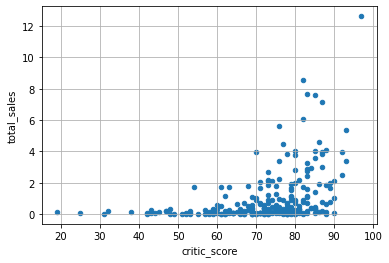

In [ ]:
(df_filtered_ps4[df_filtered_ps4['critic_score'] >= 0]
 .plot(
     x='critic_score',
     y='total_sales',
     kind='scatter',
     alpha=1, grid=True));

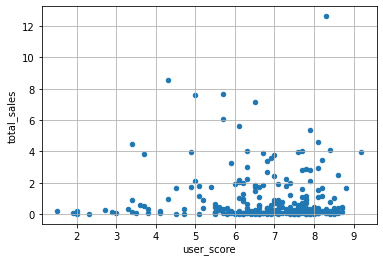

In [ ]:
(df_filtered_ps4[df_filtered_ps4['user_score'] >= 0]
 .plot(
     x='user_score',
     y='total_sales',
     kind='scatter',
     alpha=1, grid=True));

**The plotted diagrams confirm the conclusions drawn from the correlation.**

**Now let's look at similar correlations for the Xbox One platform.**

In [ ]:
df_filtered_xone[df_filtered_xone['critic_score'] >= 0][['critic_score','total_sales']].corr()

,critic_score,total_sales
critic_score,1.000000,0.416998
total_sales,0.416998,1.000000


In [ ]:
df_filtered_xone[df_filtered_xone['user_score'] >= 0][['critic_score','total_sales']].corr()

,critic_score,total_sales
critic_score,1.000000,0.333579
total_sales,0.333579,1.000000


**We see that in the case of the Xbox One platform, unlike PS4, there is a small but positive correlation between user reviews and game sales. As for the correlation between critical reviews and sales, it is similar to the PS4 platform.**

**Now let's look at similar dependencies for the PC platform.**

In [ ]:
df_filtered_pc[df_filtered_pc['critic_score'] >= 0][['critic_score','total_sales']].corr()

,critic_score,total_sales
critic_score,1.000000,0.237243
total_sales,0.237243,1.000000


In [ ]:
df_filtered_pc[df_filtered_pc['user_score'] >= 0][['user_score','total_sales']].corr()

,user_score,total_sales
user_score,1.000000,-0.121867
total_sales,-0.121867,1.000000


**In the case of the PC platform, the situation is similar to PS4, but in this case, critics' reviews are even less positively correlated with game sales.**

**Let's now look at the general distribution of games by genre. Let's evaluate the relationship between sales and genres.
What can you say about the most profitable genres? Are there genres with high and low sales?**

In [ ]:
df_filtered.groupby('genre').sum().sort_values(by='total_sales', ascending=False)['total_sales']

genre
Action          441.12
Shooter         304.73
Role-Playing    192.80
Sports          181.06
Misc             85.04
Platform         61.00
Racing           53.50
Fighting         44.49
Simulation       35.12
Adventure        29.43
Strategy         13.34
Puzzle            4.89
Name: total_sales, dtype: float64

**This is a breakdown by genre in terms of total sales.**

**Now let's see how the median sales compare by genre.**

In [ ]:
df_filtered.groupby('genre').median().sort_values(by='total_sales', ascending=False)['total_sales']

genre
Shooter         0.440
Sports          0.240
Platform        0.210
Role-Playing    0.140
Racing          0.140
Fighting        0.130
Action          0.120
Misc            0.120
Simulation      0.120
Strategy        0.080
Puzzle          0.045
Adventure       0.030
Name: total_sales, dtype: float64

**From here we can draw the following conclusions:**

**Most profitable genres: `'Action'`, `'Shooter'`, `'Sports'`.**

**The most unprofitable genres: `'Puzzle'`, `'Adventure'`.**

### Section conclusions.

**There is currently a decline in the number of new games being released since 2012.**

**The average life cycle of one platform is 9 years.**

**At the same time, these 9 years of life usually look like this: 5 years of linear growth in the release of games for the platform, followed by a linear decline in the release of the number of games for the platform.**

**To plan the purchase of potentially profitable games for 2017, it makes sense to consider data starting from 2012.**

**Most potentially profitable platforms: `'PS4'`, `'XOne'`, `'PC'`.**

**User reviews have almost no correlation with sales, but critic reviews have a slight positive correlation.**

**Most profitable genres: `'Action'`, `'Shooter'`, `'Sports'`.**

**The most unprofitable genres: `'Puzzle'`, `'Adventure'`.**

### Analysis of user profiles for each region.

**We define the following for the user of each region (NA, EU, JP):**
- The most popular platforms (top 5).
- The most popular genres (top 5).
- Does the ESRB rating affect sales in a particular region?

**Let's start by identifying the most popular platforms (top 5) for each region. First, let's create additional columns in the filtered dataframe, which will indicate the share of sales of this game from the total number of copies sold for each region.**

In [ ]:
df_filtered['share_na_sales'] = df_filtered['na_sales'] / df_filtered['na_sales'].sum()
df_filtered['share_eu_sales'] = df_filtered['eu_sales'] / df_filtered['eu_sales'].sum()
df_filtered['share_jp_sales'] = df_filtered['jp_sales'] / df_filtered['jp_sales'].sum()
df_filtered.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,total_sales_range,share_na_sales,share_eu_sales,share_jp_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,"(20.635, 24.762]",0.011879,0.017936,0.005089
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,"(12.381, 16.508]",0.016346,0.010142,0.000312
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,Empty,14.63,"(12.381, 16.508]",0.010204,0.011563,0.001869
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,Empty,14.60,"(12.381, 16.508]",0.008934,0.008267,0.022588
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79,"(12.381, 16.508]",0.008444,0.011306,0.003375


**Now let’s create our own ranking of the top 5 platforms by number of sales for each region and display the value in shares.**

In [ ]:
df_filtered.groupby('platform').sum().sort_values(by='share_na_sales', ascending=False)['share_na_sales'].head()

platform
X360    0.236983
PS4     0.184003
PS3     0.174933
XOne    0.157571
3DS     0.093592
Name: share_na_sales, dtype: float64

In [ ]:
df_filtered.groupby('platform').sum().sort_values(by='share_eu_sales', ascending=False)['share_eu_sales'].head()

platform
PS4     0.278388
PS3     0.210829
X360    0.147037
XOne    0.101794
3DS     0.084134
Name: share_eu_sales, dtype: float64

In [ ]:
df_filtered.groupby('platform').sum().sort_values(by='share_jp_sales', ascending=False)['share_jp_sales'].head()

platform
3DS     0.455862
PS3     0.183249
PSV     0.109253
PS4     0.082875
WiiU    0.067556
Name: share_jp_sales, dtype: float64

**We see that the picture differs by region. If in North America the top 1 is occupied by the American platform from Microsoft - Xbox 360, then in Europe the PS4 platform from Sony is in the lead, while in Japan the Nintendo 3DS is in the lead. The specificity of users in these regions is such that each of them prefers its own platform. However, in Europe and North America, the rest of the platform rankings are almost identical, although Japan as a market is very specific and this can be seen in how the top 5 platforms of users from Japan are very different from users from Europe and North America.**

**Now let’s look at a similar breakdown for the top 5 game genres in these 3 sales regions.**

In [ ]:
df_filtered.groupby('genre').sum().sort_values(by='share_na_sales', ascending=False)['share_na_sales'].head()

genre
Action          0.300929
Shooter         0.244970
Sports          0.137960
Role-Playing    0.108297
Misc            0.064623
Name: share_na_sales, dtype: float64

In [ ]:
df_filtered.groupby('genre').sum().sort_values(by='share_eu_sales', ascending=False)['share_eu_sales'].head()

genre
Action          0.314398
Shooter         0.223891
Sports          0.136304
Role-Playing    0.095756
Racing          0.053847
Name: share_eu_sales, dtype: float64

In [ ]:
df_filtered.groupby('genre').sum().sort_values(by='share_jp_sales', ascending=False)['share_jp_sales'].head()

genre
Role-Playing    0.339807
Action          0.274172
Misc            0.066777
Simulation      0.054055
Fighting        0.049019
Name: share_jp_sales, dtype: float64

**And again we see how the genre preferences of users from Japan differ greatly, where the Role-Playing genre is in first place, which is only in 4th place in Europe and North America. The rankings of the top 4 genres among users in Europe and North America are completely identical. This is due to the specifics of the Japanese market, which is known for its non-standard nature for users from Europe and North America.**

**Let's finally determine whether the ESRB rating affects sales in each region separately.**

In [ ]:
(df_filtered
 .groupby('rating').sum()
 .sort_values(by='share_na_sales', ascending=False)['share_na_sales'])

rating
M        0.391847
E        0.193529
Empty    0.174814
E10+     0.128094
T        0.111715
Name: share_na_sales, dtype: float64

In [ ]:
(df_filtered
 .groupby('rating').sum()
 .sort_values(by='share_eu_sales', ascending=False)['share_eu_sales'])

rating
M        0.382708
E        0.223003
Empty    0.180541
E10+     0.109252
T        0.104497
Name: share_eu_sales, dtype: float64

In [ ]:
(df_filtered
 .groupby('rating').sum()
 .sort_values(by='share_jp_sales', ascending=False)['share_jp_sales'])

rating
Empty    0.565168
E        0.147108
T        0.135113
M        0.110084
E10+     0.042528
Name: share_jp_sales, dtype: float64

**We see that the most games rated 17+ are sold in North America and Europe (38-39% of games), in second place are games rated “for everyone” (19-22%), and 3rd place (17- 18%) are occupied by data for which there is no information about the rating, which may affect the final distribution of preferences. In Japan, the leader in terms of share is data for which the rating is unknown; accordingly, we can very tentatively make an assumption about the preferences of Japanese users in game genres based on the data we have. Ideally, try to get the correct rating data from colleagues who prepared the dataset and analyze it again.**

### Section conclusions.

**The portrait of users from Japan is very different from the portrait of users from Europe and North America, both in terms of the choice of game genres, and in terms of preferences for gaming platforms and the greater popularity of games with a different ESRB rating.**

**In North America, the top 1 will be occupied by the American platform from Microsoft - Xbox 360, in Europe the leader is the PS4 platform from Sony, while in Japan the leader is Nintendo 3DS. In Europe and North America, the rest of the platform rankings are almost identical, but in Japan they are not.**

**The first place in sales in Japan is the Role-Playing genre, which is only in 4th place in Europe and North America. The ranking of the top 4 genres by users in Europe and North America is completely identical, but in Japan the ranking of genres is completely different.**

**The most games rated 17+ are sold in North America and Europe (38-39% of games), in second place are games rated “for everyone” (19-22%), and in 3rd place (17-18%) occupy data for which there is no rating information, which may affect the final distribution of preferences. In Japan, the leader in terms of share is data for which the rating is unknown; accordingly, we can very tentatively make an assumption about the preferences of Japanese users in game genres based on the data we have. Ideally, try to get the correct rating data from colleagues who prepared the dataset and analyze it again.**

## Testing hypotheses.

### Hypothesis: Average user ratings for the Xbox One and PC platforms are the same.

**The null hypothesis is that the average user ratings for the Xbox One and PC platforms are the same.**

**Alternate Hypothesis: Average user ratings for the Xbox One and PC platforms are different.**

alpha = 0.05

In [215]:
#calling a method to test the hypothesis about the equality of the average of two general populations based on samples taken from them
result = st.ttest_ind(
     df_filtered[(df_filtered['platform'] =='XOne') & (df_filtered['user_score'] > 0)]['user_score'],
     df_filtered[(df_filtered['platform'] =='PC') & (df_filtered['user_score'] > 0)]['user_score'],
     equal_var=False)
# equal_var=False, because samples are of different sizes and there are doubts that the variances of the populations are the same

alpha = 0.05 # set the significance level

print(result.pvalue) # print p-value to screen
if result.pvalue < alpha:
     print('Reject the null hypothesis')
else:
     print('Failed to reject the null hypothesis')

print('Average score for Xbox One:', df_filtered[
     (df_filtered['platform'] =='XOne') &
     (df_filtered['user_score'] > 0)]
       ['user_score'].mean().round(1))
print('Average score for PC:', df_filtered[
     (df_filtered['platform'] =='PC') &
     (df_filtered['user_score'] > 0)]
       ['user_score'].mean().round(1))

0.5489537965134912
Failed to reject the null hypothesis
Average score for Xbox One: 6.5
Average score for PC: 6.4


**According to the test results, the conclusion is that we were unable to reject the null hypothesis with the selected significance level. We believe that the average user ratings for the Xbox One and PC platforms are the same.**

### Hypothesis: Average user ratings for the Action and Sports genres are different.

**The null hypothesis is that the average user ratings for the Action and Sports genres are the same.**

**Alternate Hypothesis: Average user ratings for the Action and Sports genres are different.**

alpha = 0.05

In [216]:
#calling a method to test the hypothesis about the equality of the average of two general populations based on samples taken from them
result = st.ttest_ind(
     df_filtered[(df_filtered['genre'] =='Action') & (df_filtered['user_score'] > 0)]['user_score'],
     df_filtered[(df_filtered['genre'] =='Sports') & (df_filtered['user_score'] > 0)]['user_score'],
     equal_var=False)
# equal_var=False, because samples are of different sizes and there are doubts that the variances of the populations are the same

alpha = 0.05 # set the significance level

print(result.pvalue) # print p-value to screen
if result.pvalue < alpha:
     print('Reject the null hypothesis')
else:
     print('Failed to reject the null hypothesis')
print('Average rating for Action:', df_filtered[
     (df_filtered['genre'] =='Action') &
     (df_filtered['user_score'] > 0)]
       ['user_score'].mean().round(1))
print('Average score for Sports:', df_filtered[
     (df_filtered['genre'] =='Sports') &
     (df_filtered['user_score'] > 0)]
       ['user_score'].mean().round(1))

5.989458066467418e-20
Reject the null hypothesis
Average rating for Action: 6.8
Average score for Sports: 5.5


**According to the test results, the conclusion is that with the chosen significance level we reject the null hypothesis. We believe that the average user ratings for the Action and Sports genres are different.**

## General conclusion.

**The initial task was to identify the patterns that determine the success in terms of game sales. It is necessary to plan a campaign for 2017.**

**For successful planning, it is necessary to find out for which market (NA, EU, JP) the campaign is planned for 2017.**

**We also analyzed data in the quantities of copies sold; in business, analytics is needed from the point of view of obtaining maximum profit, i.e. we would need additional data on the cost of purchasing and selling games for our company for each platform.**

**------------------------------------------------ -------------------------------------------------- -------------------------**

**If we work globally, then the conclusions are as follows:**

**There is currently a decline in the number of new games being released since 2012.**

**The average life cycle of one gaming platform is 9 years.**

**At the same time, these 9 years of life usually look like this: 5 years of linear growth in the release of games for the platform, followed by a linear decline in the release of the number of games for the platform.**

**Most potentially profitable platforms: `'PS4'`, `'XOne'`, `'PC'`.**

**User reviews have almost no correlation with sales, but critic reviews have a slight positive correlation.**

**Most profitable genres: `'Action'`, `'Shooter'`, `'Sports'`.**

**The most unprofitable genres: `'Puzzle'`, `'Adventure'`.**